<a href="https://colab.research.google.com/github/felipessrodrigues/machinelearning/blob/aula-03/Alura_MachineLearning_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade seaborn #atualizar versao do seaborn no colab

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri) #faz a leitura do csv
dados.head() #imprime os dados iniciais

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
mapa = {
    'expected_hours' : 'horas',
    'price' : 'preco',
    'unfinished' : 'pendente'
}

dados = dados.rename(columns=mapa)
dados.head()

,pendente,horas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    1 : 0,
    0: 1
}

dados['finalizados'] = dados.pendente.map(troca)
dados.head()

,pendente,horas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='horas', ylabel='preco'>

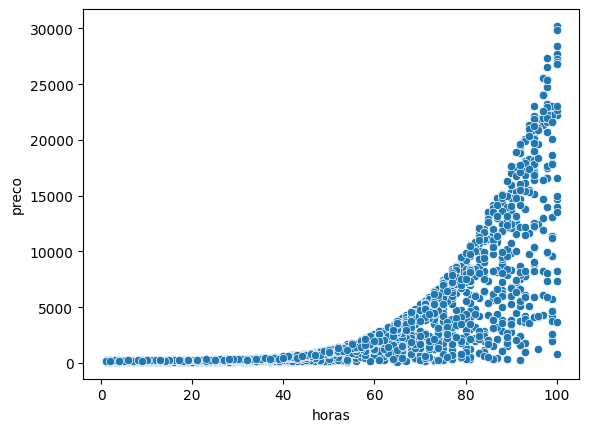

In [6]:
import seaborn as sns

sns.scatterplot(x="horas", y="preco", data=dados)

<Axes: xlabel='horas', ylabel='preco'>

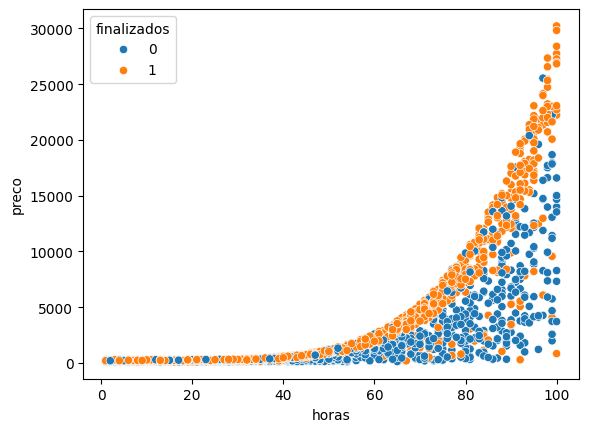

In [12]:
sns.scatterplot(x="horas", y="preco", hue="finalizados", data=dados)

In [14]:
x = dados[['horas', 'preco']]
y = dados['finalizados']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# semente, base para o random, definir a ordem do random
# serve para retirar aleatoriedade do treino e teste
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(
    x , y, random_state = SEED, test_size = 0.30)
print("Treinaremos com %d elementos e testaremos com %d elementos" %
        (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi de %.2f%%" % (acuracia*100))

Treinaremos com 1509 elementos e testaremos com 648 elementos
A acurácia foi de 48.92%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


O valor de acuracia é bom ou ruim?
Neste caso precisa de uma comparação.
Abaixo será criado um teste em que "chuta" que todos os "finalizados" são 1

In [26]:
import numpy as np
previsoes_base = np.ones(648)

In [50]:
acuracia_base = accuracy_score(teste_y, previsoes_base)
print("A acurácia do algoritmo de base foi de %.2f%%" % (acuracia_base*100))

A acurácia do algoritmo de base foi de 51.08%


<Axes: xlabel='horas', ylabel='preco'>

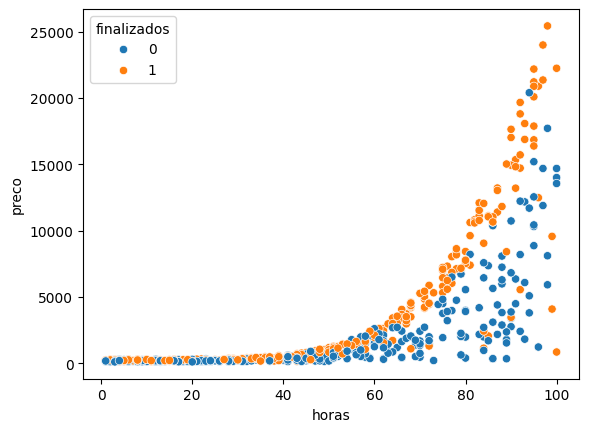

In [28]:
sns.scatterplot(x="horas", y="preco", hue=teste_y, data=teste_x)

A ideia é o algoritmo entender a curva, onde pinta tudo abaixo da curva e acima, desmontrando decisão. Aprender a curva

In [31]:
x_min = teste_x.horas.min()
x_max = teste_x.horas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min,x_max,y_min,y_max)

1 100 100 25427


A ideia é rodar ponto a ponto e de acordo com o que o algoritmo disser plota de formas diferentes.

In [37]:
pixels = 100 # definição de pixels, quanto mais, melhor
eixo_x = np.arange(x_min, x_max, (x_max-x_min) / pixels) # separar os pedacos
eixo_y = np.arange(y_min, y_max, (y_max-y_min) / pixels)

Mesclar/juntar os pontos da matriz

In [45]:
# apenas dessa forma abaixo repete o eixo, não mesclou
xx, yy = np.meshgrid(eixo_x, eixo_y)
# para mesclar, usar operacao de ravel e concatenate (c_)
pontos = np.c_[xx.ravel(), yy.ravel()] # criou os pares

In [46]:
# pegar o modelo e prever para todos os pontos
Z = modelo.predict(pontos)
# reformatar o modelo conforme matriz
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Agora plotar. Para todos os pontos rodou o modelo. Se for zero, pintar de uma cor; se for 1 de outra cor; entre zeros e 1 colocar cor diferente para vrificar a curva, desenhar o contorno. Chamado de Borda de Decisão

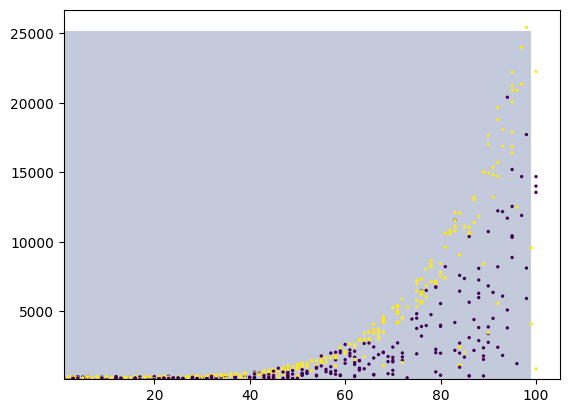

In [49]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas, teste_x.preco, c=teste_y, s=2)